In [1]:
import numpy as np
import torch
import torchvision
from torch import optim
import matplotlib.pyplot as plt
import random

### Exercice 1

In [2]:
def softmax(tensor):
    tensor = torch.exp(tensor - torch.max(tensor))
    return tensor / torch.sum(tensor)

In [3]:
x = torch.tensor([5., 1., 2., -1.])
print(softmax(x))

tensor([0.9341, 0.0171, 0.0465, 0.0023])


### Exercice 2

In [4]:
dataset = torchvision.datasets.MNIST("./", download = True)
train_set_y, train_set_x = dataset.data[:50000], dataset.targets[:50000]
test_set_y, test_set_x = dataset.data[50000:], dataset.targets[50000:]

train_set_y = (train_set_y.view(50000, -1) + 0.0)
mean_train, std_train = torch.mean(train_set_y), torch.std(train_set_y)
train_set_y = (train_set_y - mean_train)/std_train

train_set = []
for i in range(50000):
    train_set.append([train_set_x[i], train_set_y[i]])

test_set_y = (test_set_y.view(10000, -1) + 0.0)
mean_test, std_test = torch.mean(test_set_y), torch.std(test_set_y)
test_set_y = (test_set_y - mean_test)/std_test

test_set = []
for i in range(10000):
    test_set.append([test_set_x[i], test_set_y[i]])

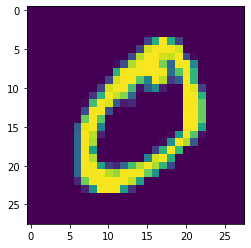

tensor(0)


In [5]:
plt.imshow(train_set[1][1].view(28, 28))
plt.show()
print(train_set[1][0])

In [6]:
W_lr = torch.load("TP4_functions/W_lr.pt").requires_grad_(True)
b_lr = torch.load("TP4_functions/b_lr.pt").requires_grad_(True)

In [7]:
print(W_lr.shape)

torch.Size([10, 784])


In [8]:
def g(y_val, W, b):
    return softmax(torch.matmul(W, y_val) + b)


def L(g, train_set, W, b):
    cross_entropy = 0
    for line in train_set:
        cross_entropy -= torch.log(g(y_val=line[1], W=W, b=b)[line[0]])
    cross_entropy /= len(train_set)
    return cross_entropy


def create_minibatch(train_set, size):
    minibatch = []
    index = random.sample(range(0, len(train_set)), size)
    for ind in index:
        minibatch.append(train_set[ind])
    return minibatch


def predict_score(test_set, g, W, b):
    correct_pred = 0
    for line in test_set:
        correct_pred += (line[0] == torch.argmax(g(y_val=line[1], W=W, b=b)))
    return correct_pred / len(test_set)


def predict_score_MEMM(Omega, test_set, g, W1, b1, W2, b2):
    correct_pred = 0
    nb_pred = 0
    for sentence in test_set:
        correct_pred += (sentence[0][0] == torch.argmax(g(y_val=sentence[1][0], W=W_lr1, b=b_lr1)))
        for i in range(len(sentence[0]) - 1):
            one_hot = torch.zeros(len(Omega))
            one_hot[sentence[0][i]] = 1
            line_extend = torch.cat([one_hot, sentence[1][i+1]], dim=0)
            correct_pred += (sentence[0][i] == torch.argmax(g(y_val=line_extend, W=W_lr2, b=b_lr2)))
        nb_pred += len(sentence[0])
    return correct_pred / nb_pred

In [9]:
train_set100 = []
for i in range(100):
    train_set100.append(train_set[i])

loss100 = L(g=g, train_set=train_set100, W=W_lr, b=b_lr)
print(f'La loss pour les 100 premières valeurs de train_set sont : {loss100}')

La loss pour les 100 premières valeurs de train_set sont : 2.4651503562927246


Loss : 2.5199525356292725
Score : 0.07460000365972519
Loss : 2.111311912536621
Score : 0.2770000100135803
Loss : 1.8416448831558228
Score : 0.4702000021934509
Loss : 1.6183602809906006
Score : 0.5993000268936157
Loss : 1.4700477123260498
Score : 0.6837999820709229
Loss : 1.2810282707214355
Score : 0.7318999767303467
Loss : 1.1367603540420532
Score : 0.763700008392334
Loss : 1.0952945947647095
Score : 0.7922000288963318
Loss : 1.013076663017273
Score : 0.8133999705314636
Loss : 0.9705221652984619
Score : 0.8215000033378601
Loss : 0.8684033155441284
Score : 0.8343999981880188
Loss : 0.8448730707168579
Score : 0.8402000069618225
Loss : 0.7590981125831604
Score : 0.8483999967575073
Loss : 0.748889148235321
Score : 0.8535000085830688
Loss : 0.667741060256958
Score : 0.8579000234603882
Loss : 0.6376969814300537
Score : 0.8647000193595886
Loss : 0.6054590344429016
Score : 0.8669000267982483
Loss : 0.5681238174438477
Score : 0.8711000084877014
Loss : 0.6016656756401062
Score : 0.87260001897811

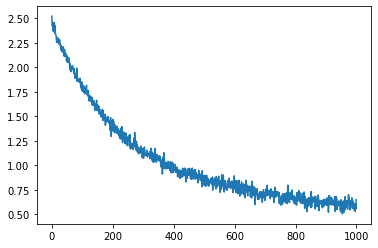

In [10]:
alpha = 5 * 1e-5

K = 1000
list_L = torch.zeros(K)
optimizer = optim.Adam([W_lr, b_lr], lr=alpha)

for k in range(K):
    optimizer.zero_grad()
    loss = L(g=g, train_set=create_minibatch(train_set=train_set, size=250), W=W_lr, b=b_lr)
    loss.backward()
    optimizer.step()
    
    list_L[k] = loss.item()
    
    if k % 50 == 0:
        print(f'Loss : {list_L[k]}')
        print(f'Score : {predict_score(test_set=test_set, g=g, W=W_lr, b=b_lr)}')


plt.plot(list_L)
plt.show()

### Exercice 3

In [11]:
from TP4_functions.load_conll2000 import load_conll2000_glove
path = "TP4_functions/"
Omega_X, train_set, test_set = load_conll2000_glove(path)

In [12]:
print(train_set[0][1])

tensor([[ 7.7302e-02, -1.8937e-04,  8.3870e-01,  ..., -7.2153e-01,
          1.1554e-01,  8.8954e-01],
        [ 8.5703e-02, -2.2201e-01,  1.6569e-01,  ..., -7.4273e-02,
          7.5808e-01, -3.4243e-01],
        [-3.8194e-02, -2.4487e-01,  7.2812e-01,  ..., -1.4590e-01,
          8.2780e-01,  2.7062e-01],
        ...,
        [ 4.5092e-01, -4.6885e-01, -2.3471e-01,  ...,  2.4301e-01,
         -3.6966e-01, -2.3181e-01],
        [-1.7509e-01,  7.3102e-01,  1.2163e+00,  ..., -3.4376e-01,
          1.0529e+00, -1.3476e+00],
        [-3.3979e-01,  2.0941e-01,  4.6348e-01,  ..., -2.3394e-01,
          4.7298e-01, -2.8803e-02]])


In [13]:
W_lr1 = torch.load("TP4_functions/W_lr1.pt").requires_grad_(True)
b_lr1 = torch.load("TP4_functions/b_lr1.pt").requires_grad_(True)
W_lr2 = torch.load("TP4_functions/W_lr2.pt").requires_grad_(True)
b_lr2 = torch.load("TP4_functions/b_lr2.pt").requires_grad_(True)

In [14]:
print(W_lr1.shape)
print(train_set[0][1].shape)

torch.Size([15, 100])
torch.Size([37, 100])


In [15]:
index_to_tagging = {}
tagging_to_index = {}

for index, tagging in enumerate(Omega_X):
    index_to_tagging[index] = tagging
    tagging_to_index[tagging] = index

train_words = [i[1] for i in train_set]
test_words = [i[1] for i in test_set]
train_index = []
test_index = []

for line in train_set:
    line_index = []
    for tagging in line[0]:
        line_index.append(tagging_to_index[tagging])
    train_index.append(line_index)

for line in test_set:
    line_index = []
    for tagging in line[0]:
        line_index.append(tagging_to_index[tagging])
    test_index.append(line_index)
    
train_set = list(zip(train_index, train_words))
test_set = list(zip(test_index, test_words))

0
Loss : 2.901962995529175
Score : 0.03738100826740265
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
Loss : 2.466869592666626
Score : 0.25176772475242615
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
Loss : 2.7368452548980713
Score : 0.27070096135139465
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
Loss : 2.121633291244507
Score : 0.27973487973213196
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
Loss : 2.3314695358276367
Score : 0.3082508444786072
201
202
203
204
205
206
207
208
209
210


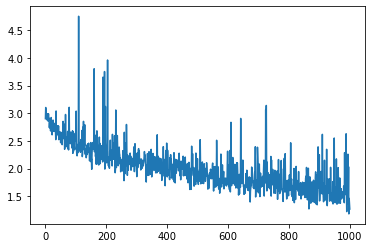

CPU times: user 14min 48s, sys: 1.46 s, total: 14min 49s
Wall time: 3min 14s


In [16]:
%%time

alpha = 5 * 1e-4

K = 1000
list_L = torch.zeros(K)
optimizer = optim.Adam([W_lr1, b_lr1, W_lr2, b_lr2], lr=alpha)

for k in range(K):
    print(k)
    optimizer.zero_grad()
    
    minibatch = create_minibatch(train_set=train_set, size=32)
    
    loss = 0
    for sentence in minibatch:
        loss -= torch.log(g(y_val=sentence[1][0], W=W_lr1, b=b_lr1))[sentence[0][0]]
        for i in range(len(sentence[0]) - 1):
            one_hot = torch.zeros(len(Omega_X))
            one_hot[sentence[0][i]] = 1
            line_extend = torch.cat([one_hot, sentence[1][i+1]], dim=0)
            loss -= torch.log(g(y_val=line_extend, W=W_lr2, b=b_lr2))[sentence[0][i]]
        loss /= len(sentence[0])
    
    loss.backward()
    optimizer.step()
    
    list_L[k] = loss.item()
    if k % 50 == 0:
        print(f'Loss : {list_L[k]}')
        print(f'Score : {predict_score_MEMM(Omega=Omega_X, test_set=test_set, g=g, W1=W_lr1, b1=b_lr1, W2=W_lr2, b2=b_lr2)}')


plt.plot(list_L)
plt.show()